                        西瓜数据集

| 编号 | 色泽 | 根蒂 | 敲声 | 纹理 | 脐部 | 触感 | 密度  | 含糖率 | 好瓜 |
| ---- | ---- | ---- | ---- | ---- | ---- | ---- | ----- | ------ | ---- |
| 1    | 青绿 | 蜷缩 | 浊响 | 清晰 | 凹陷 | 硬滑 | 0.697 | 0.46   | 是   |
| 2    | 乌黑 | 蜷缩 | 沉闷 | 清晰 | 凹陷 | 硬滑 | 0.774 | 0.376  | 是   |
| 3    | 乌黑 | 蜷缩 | 浊响 | 清晰 | 凹陷 | 硬滑 | 0.634 | 0.264  | 是   |
| 4    | 青绿 | 蜷缩 | 沉闷 | 清晰 | 凹陷 | 硬滑 | 0.608 | 0.318  | 是   |
| 5    | 浅白 | 蜷缩 | 浊响 | 清晰 | 凹陷 | 硬滑 | 0.556 | 0.215  | 是   |
| 6    | 青绿 | 稍蜷 | 浊响 | 清晰 | 稍凹 | 软粘 | 0.403 | 0.237  | 是   |
| 7    | 乌黑 | 稍蜷 | 浊响 | 稍糊 | 稍凹 | 软粘 | 0.481 | 0.149  | 是   |
| 8    | 乌黑 | 稍蜷 | 浊响 | 清晰 | 稍凹 | 硬滑 | 0.437 | 0.211  | 是   |
| 9    | 乌黑 | 稍蜷 | 沉闷 | 稍糊 | 稍凹 | 硬滑 | 0.666 | 0.091  | 否   |
| 10   | 青绿 | 硬挺 | 清脆 | 清晰 | 平坦 | 软粘 | 0.243 | 0.267  | 否   |
| 11   | 浅白 | 硬挺 | 清脆 | 模糊 | 平坦 | 硬滑 | 0.245 | 0.057  | 否   |
| 12   | 浅白 | 蜷缩 | 浊响 | 模糊 | 平坦 | 软粘 | 0.343 | 0.099  | 否   |
| 13   | 青绿 | 稍蜷 | 浊响 | 稍糊 | 凹陷 | 硬滑 | 0.639 | 0.161  | 否   |
| 14   | 浅白 | 稍蜷 | 沉闷 | 稍糊 | 凹陷 | 硬滑 | 0.657 | 0.198  | 否   |
| 15   | 乌黑 | 稍蜷 | 浊响 | 清晰 | 稍凹 | 软粘 | 0.36  | 0.37   | 否   |
| 16   | 浅白 | 蜷缩 | 浊响 | 模糊 | 平坦 | 硬滑 | 0.593 | 0.042  | 否   |
| 17   | 青绿 | 蜷缩 | 沉闷 | 稍糊 | 稍凹 | 硬滑 | 0.719 | 0.103  | 否   |

1. 请用色泽,根蒂,敲声,纹理,脐部,触感,密度,好瓜作为特征，建立对含糖率的线性估计模型。考虑使用适当的评估方法选择合适的模型参数。（2分）

2. 请使用色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率作为特征，建立对好瓜的对数几率回归模型。（3分）

3. 请使用根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜作为特征，建立对色泽的多类分类模型。（5分）


对数据进行预处理，将离散属性色泽,根蒂,敲声,纹理,脐部,触感的值转换为连续值（假设这里属性间都存在“序”关系）

$$X_{i}^{色泽}=\left\{\begin{matrix}0.0，X_{i}=青绿
 \\0.5，X_{i}=乌黑
 \\1.0，X_{i}=浅白

\end{matrix}\right.

, X_{i}^{根蒂}=\left\{\begin{matrix}0.0，X_{i}=蜷缩
 \\0.5，X_{i}=稍缩
 \\1.0，X_{i}=硬挺

\end{matrix}\right.

, X_{i}^{敲声}=\left\{\begin{matrix}0.0，X_{i}=清脆
 \\0.5，X_{i}=浊响
 \\1.0，X_{i}=沉闷

\end{matrix}\right.
$$

$$
X_{i}^{纹理}=\left\{\begin{matrix}0.0，X_{i}=清晰
 \\0.5，X_{i}=稍糊
 \\1.0，X_{i}=模糊

\end{matrix}\right.

, X_{i}^{脐部}=\left\{\begin{matrix}0.0，X_{i}=平坦
 \\0.5，X_{i}=稍凹
 \\1.0，X_{i}=凹陷

\end{matrix}\right.

, X_{i}^{触感}=\left\{\begin{matrix}0.0，X_{i}=硬滑

 \\1.0，X_{i}=软粘

\end{matrix}\right.
$$

$$
X_{i}^{好瓜}=\left\{\begin{matrix}0.0，X_{i}=否

 \\1.0，X_{i}=是

\end{matrix}\right.
$$

接下来按照如图关系进行数值转换

In [231]:
from functools import lru_cache
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def dataTransform(path)-> None:  # 对离散数据值进行转换
    data = pd.read_csv(path)
    data = data[['色泽','根蒂','敲声','纹理','脐部','触感','密度','含糖率','好瓜']]
    returndata = []
    for datai in data.values:
        temp =[]
        for dataii in datai:
            if dataii in ['青绿','蜷缩','清脆','清晰','平坦','硬滑','否']:
                temp.append(0.0)
            elif dataii in ['乌黑','稍蜷','浊响','稍糊','稍凹']:
                temp.append(0.5)
            elif isinstance(dataii,float) == True:
                temp.append(dataii)
            else:
                temp.append(1.0)
        returndata.append(temp)
    return returndata
# np.array(dataTransform())

def sigmoid(z):
	return 1.0 / (1 + np.exp(-z))

使用 `广义回归模型` 解决第一题

得分： 0.5368386371736338 
最佳拟合线:截距 0.2421688818367096 
回归系数： [-0.04355537 -0.03818199 -0.08243423 -0.13902141  0.10685236  0.06403155
  0.02657853]
[0.12048275 0.22081439 0.28710909 0.26538111 0.31002965]


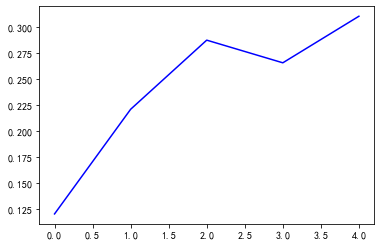

In [560]:
from sklearn.linear_model import LinearRegression
data = dataTransform(path='../datasets/watermelon.csv')

train,test = train_test_split(data,test_size=0.25) # 分割训练集和验证集
train,test = np.array(train),np.array(test) # 将 list 转为 np.ndarray

model = LinearRegression()
model.fit(train[::,:-2],train[::,-2])
score = model.score(test[::,:-2],test[::,-2])

a  = model.intercept_      #截距
b = model.coef_            #回归系数 
print("得分：",score,"\n最佳拟合线:截距",a,"\n回归系数：",b)

#对线性回归进行预测
 
Y_pred = model.predict(test[::,:-2])
print(Y_pred)
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
#显示图像
plt.show()



使用 `对数几率回归` 解决第二题

In [494]:
class LogisticsRegression(object):

    def __init__(self,train_data,train_feature,test_data,test_feature) -> None:
        self.train_data = train_data
        self.train_feature = train_feature
        self.test_data = test_data
        self.test_feature = test_feature  

    def train(self):
        # 将列表转化为矩阵
        data = np.mat(self.train_data)
        label = np.mat(self.train_feature).transpose() 
        
        w = np.ones((len(self.train_data[0])+1, 1))     #初始化参数w
        a = np.ones((len(self.train_data), 1))          #属性矩阵最后添加一列全1列（参数w中有常数参数
        data = np.c_[data, a]
        n = 0.0001  #步长
	    #每次迭代计算一次正确率（在测试集上的正确率）
	    #达到0.75的正确率，停止迭代
        rightrate = 0.0
        while rightrate < 0.05:#计算当前参数w下的预测值
            c = sigmoid(np.dot(data, w))#梯度下降的计算过程，对照着梯度下降的公式
            change = np.dot(np.transpose(data), c - label)
            w = w - change * n
	    	#预测，更新正确率
            rightrate = self.test(self.test_data, self.test_feature, w)
            return w


    def test(self,data, feature, w):
        data = np.mat(data)
        a = np.ones((len(data), 1))
        data = np.c_[data, a]
        y = sigmoid(np.dot(data, w))     #使用训练好的参数w进行计算
        b = np.shape(y)[0]
        rightcount = 0    	             #记录预测正确的个数，用于计算正确率
        for i in range(b):
    		#预测标签
            flag = -1
    		#大于0.5的为正例
            if y[i] > 0.5:
                flag = 1
    		#小于等于0.5的为反例
            else:
                flag = 0
    		#记录预测正确的个数
            # print(feature[i])
            if feature[i] == flag:
                rightcount += 1

    	#正确率
        rightrate = rightcount / len(data)
        return rightrate

data = dataTransform(path='../datasets/watermelon.csv')

train,test = train_test_split(data,test_size=0.35) # 分割训练集和验证集
train,test = np.array(train),np.array(test) # 将 list 转为 np.ndarray

lr  = LogisticsRegression(train[::,:-1],train[::,-1],test[::,:-1],test[::,-1])
w = lr.train()
print("第二题正确率：",100*lr.test(test[::,:-1], test[::,-1], w),"%")

第二题正确率： 83.33333333333334 %


使用 `OvO` 分类器解决第三题 

In [566]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
d=load_digits()
x=d.data
y=d.target
# print(d)
data = dataTransform('../datasets/watermelon.csv')
train,test = train_test_split(data,test_size=0.35) # 分割训练集和验证集
train,test = np.array(train),np.array(test) # 将 list 转为 np.ndarray
log_reg1=LogisticRegression(multi_class="multinomial",solver="newton-cg")
ovo=OneVsOneClassifier(log_reg1)
print(train[::,1:],(train[::,0]))
ovo.fit(train[::,1:],(train[::,0]).astype('int'))
score = ovo.score(test[::,1:],test[::,0].astype('int'))
print("得分：",score)

[[0.    0.5   0.    1.    0.    0.634 0.264 1.   ]
 [0.    1.    0.    1.    0.    0.774 0.376 1.   ]
 [0.5   0.5   0.    0.5   0.    0.437 0.211 1.   ]
 [0.    0.5   0.    1.    0.    0.697 0.46  1.   ]
 [1.    0.    1.    0.    0.    0.245 0.057 0.   ]
 [0.    0.5   0.    1.    0.    0.556 0.215 1.   ]
 [0.    1.    0.    1.    0.    0.608 0.318 1.   ]
 [0.5   0.5   0.    0.5   1.    0.403 0.237 1.   ]
 [0.5   1.    0.5   1.    0.    0.657 0.198 0.   ]
 [0.5   0.5   0.    0.5   1.    0.36  0.37  0.   ]
 [0.5   1.    0.5   0.5   0.    0.666 0.091 0.   ]] [0.5 0.5 0.5 0.  1.  1.  0.  0.  1.  0.5 0.5]
得分： 0.8333333333333334
